In [1]:
#Importing required libraries

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.svm import SVR

In [2]:
df=pd.read_excel("database_new.xlsx")

In [3]:
df.shape

(18526, 36)

In [4]:
df.head()

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics
0,660,1.5,0,15.0,1.0,15.000000,15.000000,23.829600,2,0.0952,...,0.000389,0.003798,706.858347,0.000083,0.000083,2.750739e-07,0.003318,3.897000,3.897000,na
1,660,1.5,0,15.0,2.0,18.898816,18.898816,33.934547,2,0.0952,...,0.001005,0.008979,1122.067684,0.000173,0.000172,1.128127e-06,0.006529,4.047873,4.047873,na
2,660,1.5,0,15.0,3.0,21.633744,21.633744,41.730020,2,0.0952,...,0.001755,0.016226,1470.324613,0.000270,0.000267,2.579832e-06,0.009558,4.202000,4.202000,na
3,660,1.5,0,15.0,4.0,23.811016,23.811016,48.324498,2,0.0952,...,0.002516,0.022854,1781.171422,0.000362,0.000357,4.481784e-06,0.012386,4.212966,4.212966,na
4,660,1.5,0,15.0,5.0,25.649639,25.649639,54.149126,2,0.0952,...,0.003323,0.029703,2066.866345,0.000454,0.000447,6.867783e-06,0.015117,4.220137,4.220137,na


In [11]:
df.corr(method='spearman')

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_abs,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc
wavelength,1.000000,0.002971,-0.001181,-0.001181,-0.000347,-0.000551,-0.000347,-0.000486,NaN,-1.000000,...,-0.374557,-0.272930,-0.162173,-0.000551,-0.144163,-0.144666,-0.153781,-0.156887,-0.663962,-0.851498
fractal_dimension,0.002971,1.000000,0.005675,0.005675,0.000541,0.002048,0.000541,0.001557,NaN,-0.002971,...,0.018457,0.218342,-0.077760,0.002048,0.046129,0.008699,0.122116,0.308230,0.023677,0.041301
fraction_of_coating,-0.001181,0.005675,1.000000,1.000000,-0.002987,0.284396,-0.002987,0.191538,NaN,0.001181,...,-0.281189,0.108488,0.194205,0.284396,0.119418,0.086154,0.193596,0.365258,-0.682960,0.446231
primary_particle_size,-0.001181,0.005675,1.000000,1.000000,-0.002987,0.284396,-0.002987,0.191538,NaN,0.001181,...,-0.281189,0.108488,0.194205,0.284396,0.119418,0.086154,0.193596,0.365258,-0.682960,0.446231
number_of_primary_particles,-0.000347,0.000541,-0.002987,-0.002987,1.000000,0.945508,1.000000,0.975343,NaN,0.000347,...,0.857268,0.903642,0.918290,0.945508,0.974908,0.981776,0.946803,0.780848,-0.001085,0.011703
vol_equi_radius_outer,-0.000551,0.002048,0.284396,0.284396,0.945508,1.000000,0.945508,0.993790,NaN,0.000551,...,0.715687,0.900958,0.943301,1.000000,0.968513,0.961358,0.970764,0.881026,-0.221023,0.145924
vol_equi_radius_inner,-0.000347,0.000541,-0.002987,-0.002987,1.000000,0.945508,1.000000,0.975343,NaN,0.000347,...,0.857268,0.903642,0.918290,0.945508,0.974908,0.981776,0.946803,0.780848,-0.001085,0.011703
equi_mobility_dia,-0.000486,0.001557,0.191538,0.191538,0.975343,0.993790,0.975343,1.000000,NaN,0.000486,...,0.771094,0.912619,0.946133,0.993790,0.982764,0.980129,0.974610,0.857318,-0.150203,0.102804
mie_epsilon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length_scale_factor,-1.000000,-0.002971,0.001181,0.001181,0.000347,0.000551,0.000347,0.000486,NaN,1.000000,...,0.374557,0.272930,0.162173,0.000551,0.144163,0.144666,0.153781,0.156887,0.663962,0.851498


In [5]:
#!pip install autoviz

<AxesSubplot:>

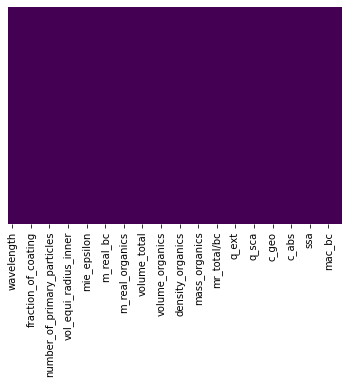

In [8]:
#Check if any null or NaN values in dataset

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot:>

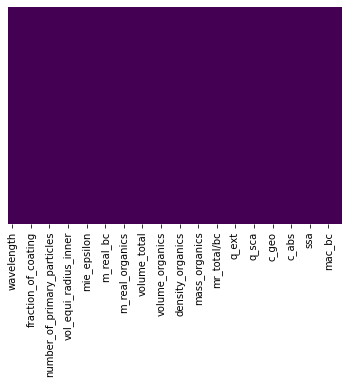

In [9]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')


Data distribution

In [8]:
#Wavelength

<AxesSubplot:xlabel='wavelength', ylabel='Count'>

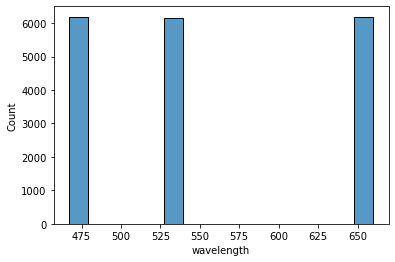

In [9]:
sns.histplot(df['wavelength'])

In [10]:
df['wavelength'].unique()

array([660, 530, 467], dtype=int64)

In [11]:
#Fractal dimension

<AxesSubplot:xlabel='fractal_dimension', ylabel='Count'>

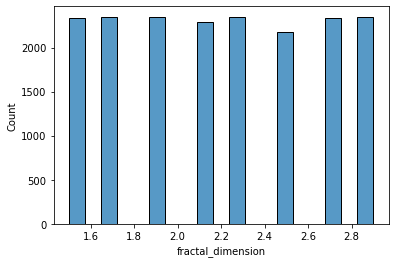

In [12]:
sns.histplot(df['fractal_dimension'])

In [13]:
df['fractal_dimension'].unique()

array([1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9])

In [13]:
#Fraction of coating

In [18]:
temp1_set = df[(df['fraction_of_coating'] ==30)]

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

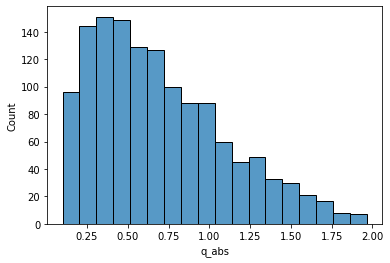

In [19]:
sns.histplot(temp1_set['q_abs'])

In [20]:
temp2_set = df[(df['fraction_of_coating'] ==40)]

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

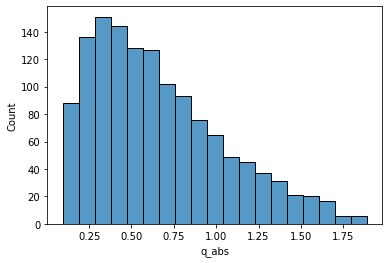

In [21]:
sns.histplot(temp2_set['q_abs'])

In [22]:
temp3_set = df[(df['fraction_of_coating'] ==50)]

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

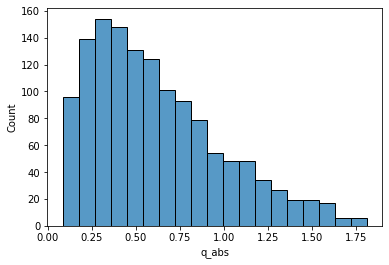

In [23]:
sns.histplot(temp3_set['q_abs'])

In [24]:
temp4_set = df[(df['fraction_of_coating'] ==60)]

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

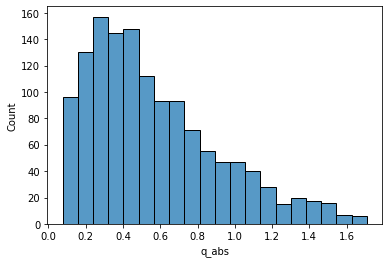

In [25]:
sns.histplot(temp4_set['q_abs'])

In [4]:
test_set = df[(df['fraction_of_coating'] >= 30) & (df['fraction_of_coating'] <= 50)]

In [7]:
train_set = df[(df['fraction_of_coating'] < 30) | (df['fraction_of_coating'] > 50)]

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

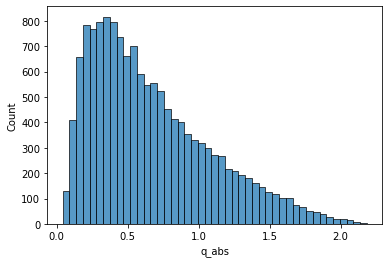

In [8]:
sns.histplot(train_set['q_abs'])

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

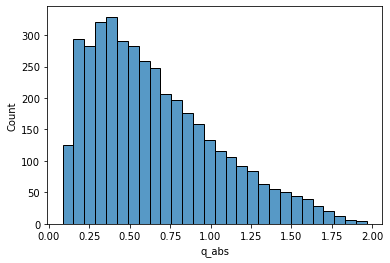

In [9]:
sns.histplot(test_set['q_abs'])

<AxesSubplot:xlabel='q_sca', ylabel='Count'>

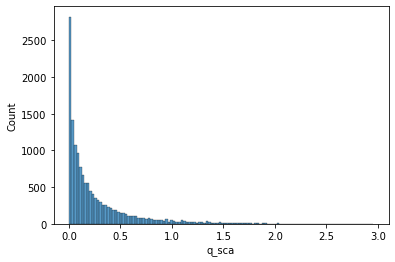

In [10]:
sns.histplot(train_set['q_sca'])

<AxesSubplot:xlabel='q_sca', ylabel='Count'>

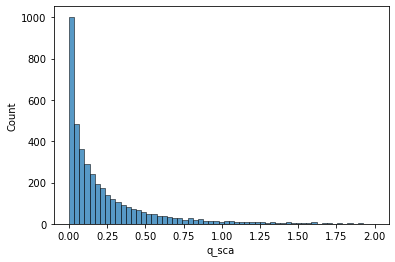

In [11]:
sns.histplot(test_set['q_sca'])

<AxesSubplot:xlabel='g', ylabel='Count'>

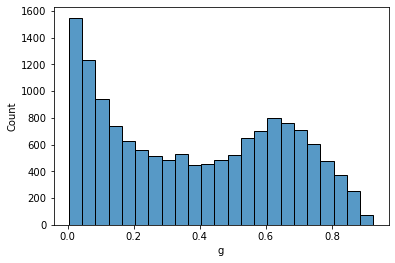

In [12]:
sns.histplot(train_set['g'])

<AxesSubplot:xlabel='g', ylabel='Count'>

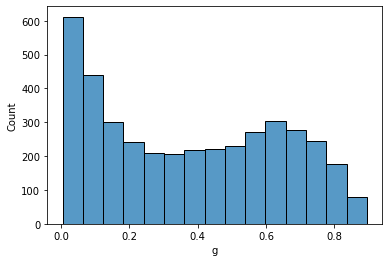

In [13]:
sns.histplot(test_set['g'])

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

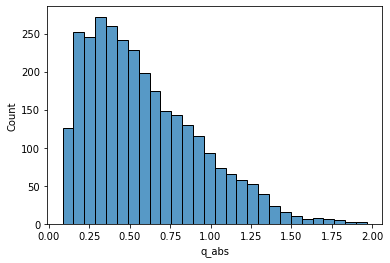

In [14]:
sns.histplot(test_set['q_abs'][:3000])

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

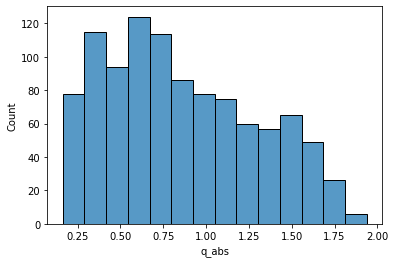

In [15]:
sns.histplot(test_set['q_abs'][3000:])

<AxesSubplot:xlabel='fraction_of_coating', ylabel='Count'>

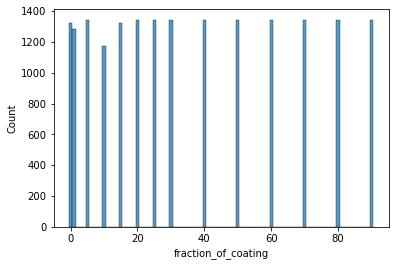

In [14]:
sns.histplot(df['fraction_of_coating'], discrete=True)

In [15]:
df['fraction_of_coating'].unique()

array([ 0,  1,  5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90],
      dtype=int64)

<AxesSubplot:xlabel='primary_particle_size', ylabel='Count'>

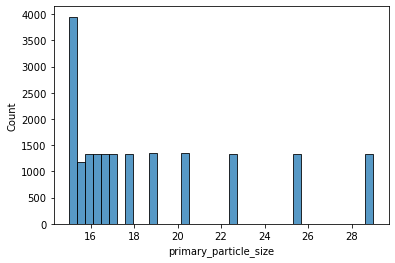

In [16]:
sns.histplot(df['primary_particle_size'])

In [17]:
df['primary_particle_size'].unique()

array([15. , 15.1, 15.3, 15.5, 15.8, 16.2, 16.5, 16.9, 17.8, 18.9, 20.4,
       22.4, 25.6, 29. ])

<AxesSubplot:xlabel='number_of_primary_particles', ylabel='Count'>

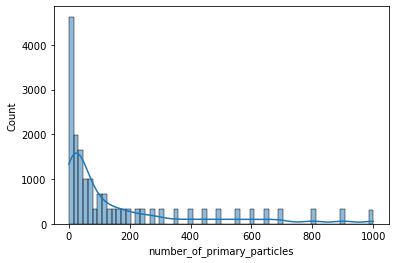

In [17]:
sns.histplot(df['number_of_primary_particles'], kde=True)

<AxesSubplot:xlabel='number_of_primary_particles', ylabel='Count'>

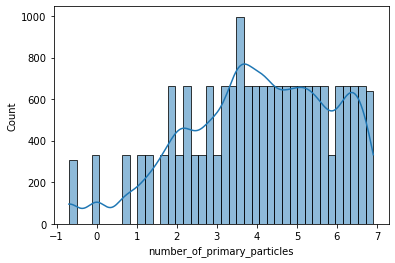

In [16]:
import numpy as np
sns.histplot(np.log(df['number_of_primary_particles']), kde=True)

In [19]:
num_pp=df['number_of_primary_particles'].unique()
for i in range(0,len(num_pp)):
    num_pp[i]=float(num_pp[i])
    print(num_pp[i])
    


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
12.0
14.0
16.0
18.0
20.0
23.0
26.0
29.0
31.0
34.0
36.0
39.0
42.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
85.0
95.0
105.0
115.0
125.0
140.0
155.0
170.0
185.0
200.0
225.0
250.0
275.0
300.0
350.0
400.0
450.0
500.0
550.0
600.0
650.0
700.0
800.0
900.0
1000.0
0.5


<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

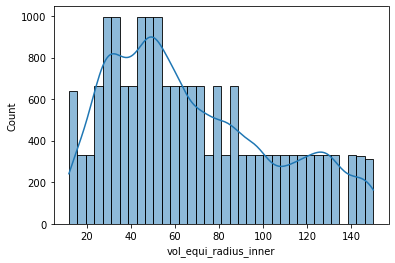

In [20]:
sns.histplot(df['vol_equi_radius_inner'], kde=True)

<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

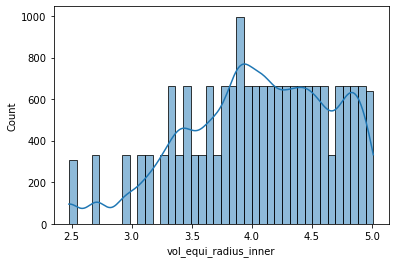

In [18]:
sns.histplot(np.log(df['vol_equi_radius_inner']), kde=True)

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

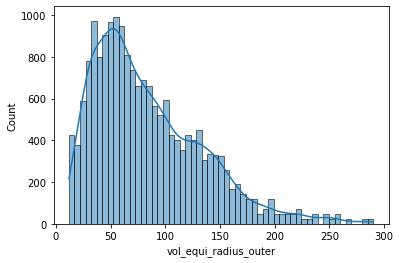

In [21]:
sns.histplot(df['vol_equi_radius_outer'], kde=True)

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

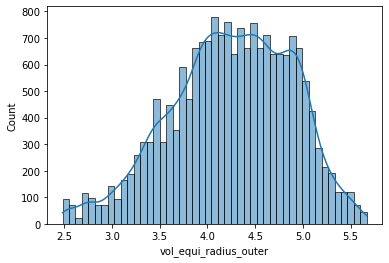

In [26]:
sns.histplot(np.log(df['vol_equi_radius_outer']), kde=True)

<AxesSubplot:xlabel='equi_mobility_dia', ylabel='Count'>

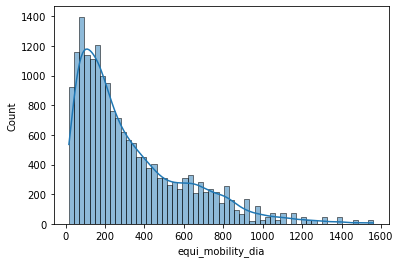

In [22]:
sns.histplot(df['equi_mobility_dia'], kde=True)

<AxesSubplot:xlabel='equi_mobility_dia', ylabel='Count'>

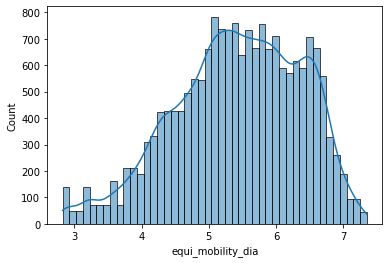

In [20]:
sns.histplot(np.log(df['equi_mobility_dia']), kde=True)

In [23]:
df['mie_epsilon'].unique()

array([2], dtype=int64)

Only 1 value -> 2

In [24]:
df['length_scale_factor'].unique()

array([0.09519978, 0.11855067, 0.13454358])

<AxesSubplot:xlabel='length_scale_factor', ylabel='Count'>

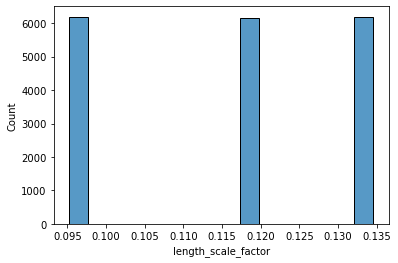

In [18]:
sns.histplot(df['length_scale_factor'])

In [19]:
length_scale_factor=2*math.pi/df['wavelength']

<AxesSubplot:xlabel='wavelength', ylabel='Count'>

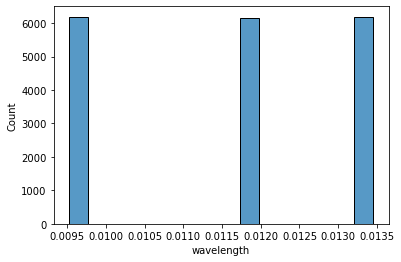

In [20]:
sns.histplot(length_scale_factor)

length_scale_factor = 2*pi/wavelength. Dependednt on wavelength feature

<AxesSubplot:xlabel='m_real_bc', ylabel='Count'>

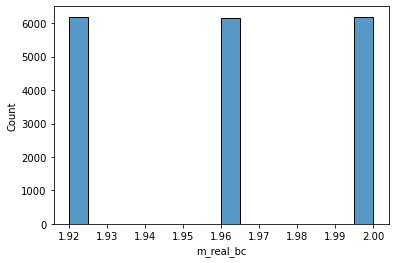

In [25]:
sns.histplot(df['m_real_bc'])

In [26]:
df['m_real_bc'].unique()

array([2.  , 1.96, 1.92])

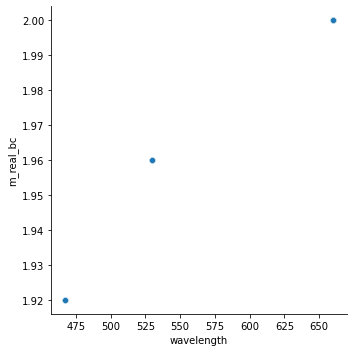

In [6]:
sns.relplot(data=df, x='wavelength',y='m_real_bc')

In [9]:
w = df['wavelength']
len(w)

18526

m_real_bc has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_im_bc', ylabel='Count'>

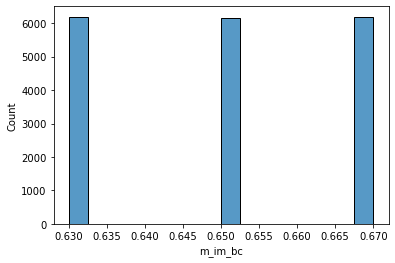

In [27]:
sns.histplot(df['m_im_bc'])

In [28]:
df['m_im_bc'].unique()

array([0.63, 0.65, 0.67])

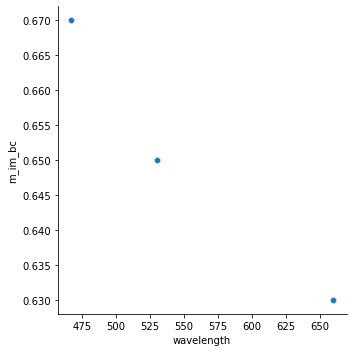

In [10]:
sns.relplot(data=df, x='wavelength',y='m_im_bc')

m_im_bc has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_real_organics', ylabel='Count'>

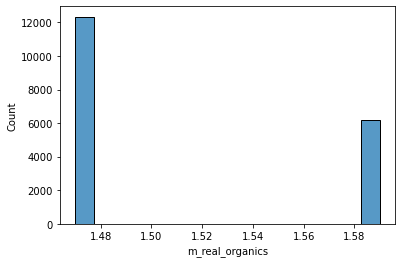

In [29]:
sns.histplot(df['m_real_organics'])

In [30]:
df['m_real_organics'].unique()

array([1.47, 1.59])

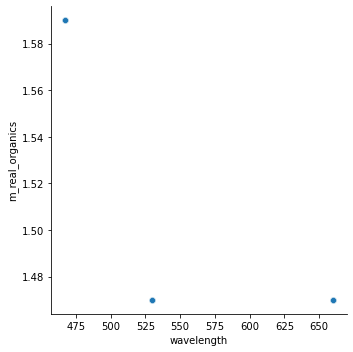

In [11]:
sns.relplot(data=df, x='wavelength',y='m_real_organics')

m_real_organics has only 2 observations as above. Can be considered categorical

<AxesSubplot:xlabel='m_im_organics', ylabel='Count'>

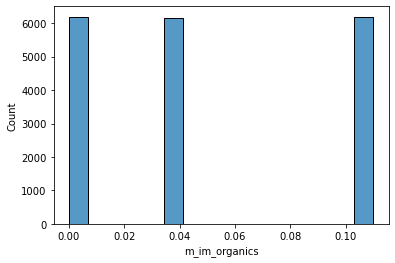

In [31]:
sns.histplot(df['m_im_organics'])

In [32]:
df['m_im_organics'].unique()

array([0.  , 0.04, 0.11])

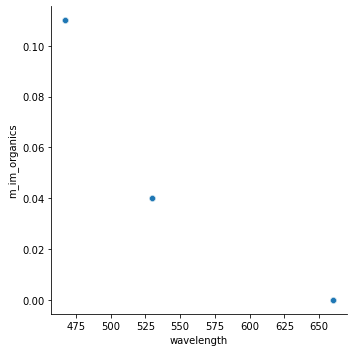

In [12]:
sns.relplot(data=df, x='wavelength',y='m_im_organics')

m_im_organics has only 3 observations as above. Can be considered categorical

<AxesSubplot:xlabel='volume_total', ylabel='Count'>

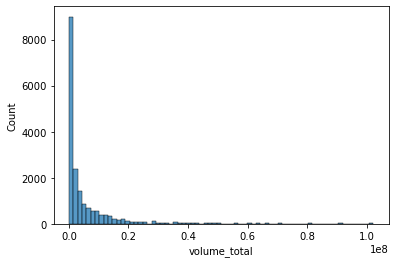

In [33]:
sns.histplot(df['volume_total'], bins= 70)

<AxesSubplot:xlabel='volume_bc', ylabel='Count'>

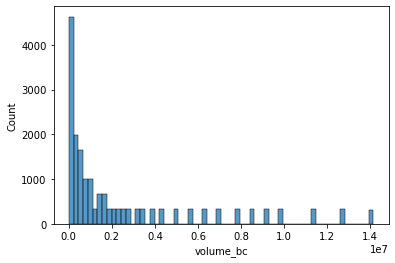

In [34]:
sns.histplot(df['volume_bc'])

<AxesSubplot:xlabel='volume_organics', ylabel='Count'>

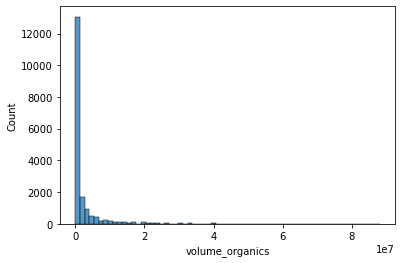

In [35]:
sns.histplot(df['volume_organics'], bins=65)

Density=Mass/Volume

In [36]:
df['density_bc'].unique()

array([1.5])

In [37]:
df['density_organics'].unique()

array([1.1])

<AxesSubplot:xlabel='mass_total', ylabel='Count'>

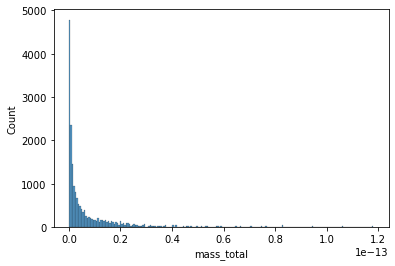

In [38]:
sns.histplot(df['mass_total'])

<AxesSubplot:xlabel='mass_bc', ylabel='Count'>

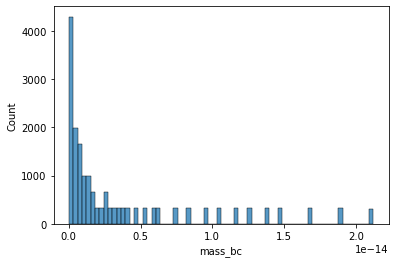

In [39]:
sns.histplot(df['mass_bc'], bins=70)

<AxesSubplot:xlabel='mass_organics', ylabel='Count'>

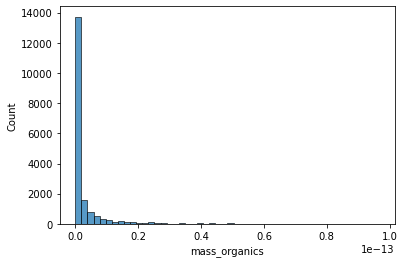

In [40]:
sns.histplot(df['mass_organics'], bins=50)

<AxesSubplot:xlabel='mr_total/bc', ylabel='Count'>

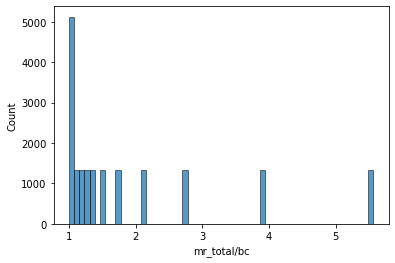

In [41]:
sns.histplot(df['mr_total/bc'])

In [42]:
df['mr_total/bc'].unique()

array([1.        , 1.01476466, 1.04488587, 1.07580494, 1.12370236,
       1.19045547, 1.24273333, 1.3154548 , 1.49209426, 1.73360907,
       2.1113344 , 2.1113344 , 2.70881312, 3.91208644, 5.56600494])

<AxesSubplot:xlabel='mr_nonBC/BC', ylabel='Count'>

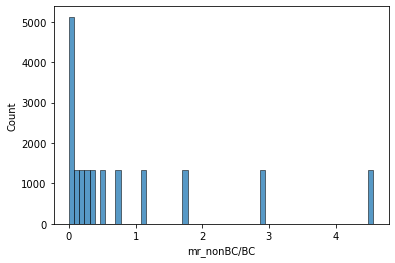

In [43]:
sns.histplot(df['mr_nonBC/BC'])

In [44]:
df['mr_nonBC/BC'].unique()

array([0.        , 0.01476466, 0.01476466, 0.01476466, 0.01476466,
       0.01476466, 0.01476466, 0.01476466, 0.01476466, 0.01476466,
       0.04488587, 0.04488587, 0.04488587, 0.04488587, 0.04488587,
       0.04488587, 0.04488587, 0.04488587, 0.04488587, 0.07580494,
       0.07580494, 0.07580494, 0.07580494, 0.07580494, 0.07580494,
       0.07580494, 0.07580494, 0.07580494, 0.12370236, 0.12370236,
       0.19045547, 0.19045547, 0.24273333, 0.3154548 , 0.3154548 ,
       0.49209426, 0.49209426, 0.73360907, 0.73360907, 0.73360907,
       1.1113344 , 1.1113344 , 1.70881312, 2.91208644, 4.56600494])

In [45]:
#Optical properties

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

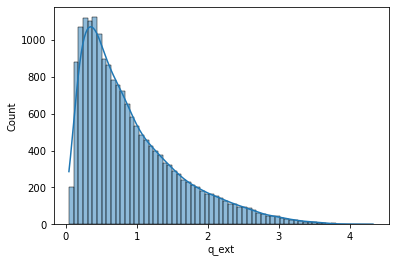

In [46]:
sns.histplot(df['q_ext'], kde=True)

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

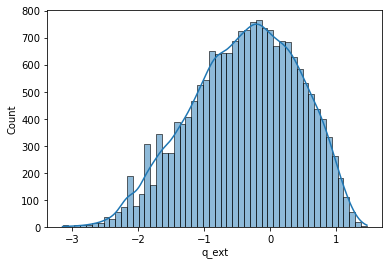

In [21]:
sns.histplot(np.log(df['q_ext']), kde=True)

<AxesSubplot:xlabel='q_abs', ylabel='Count'>

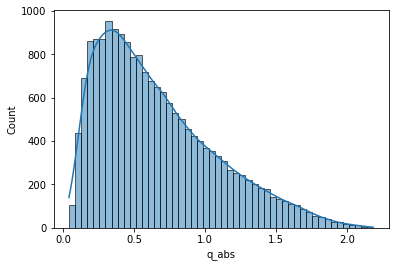

In [47]:
sns.histplot(df['q_abs'], kde=True)

<AxesSubplot:xlabel='q_sca', ylabel='Count'>

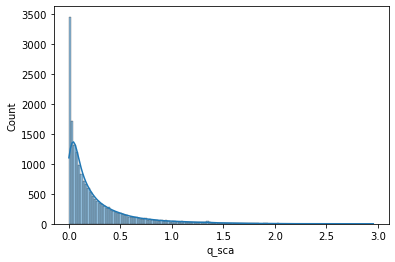

In [48]:
sns.histplot(df['q_sca'], kde=True)

<AxesSubplot:xlabel='g', ylabel='Count'>

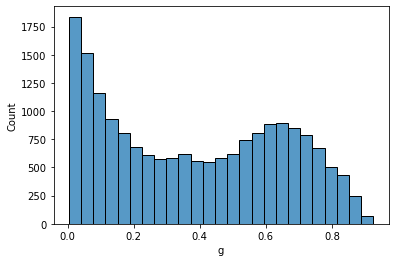

In [49]:
sns.histplot(df['g'])

<AxesSubplot:xlabel='c_geo', ylabel='Count'>

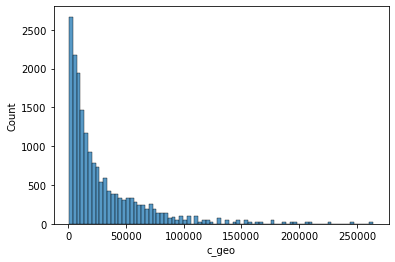

In [50]:
sns.histplot(df['c_geo'], bins=80)

<AxesSubplot:xlabel='c_ext', ylabel='Count'>

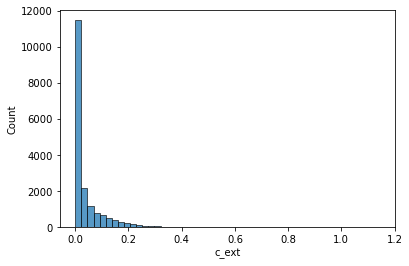

In [51]:
sns.histplot(df['c_ext'], bins=50)

<AxesSubplot:xlabel='c_abs', ylabel='Count'>

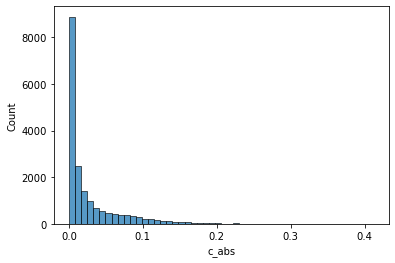

In [52]:
sns.histplot(df['c_abs'], bins=50)

<AxesSubplot:xlabel='ssa', ylabel='Count'>

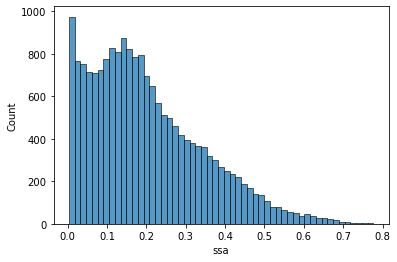

In [53]:
sns.histplot(df['ssa'])

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

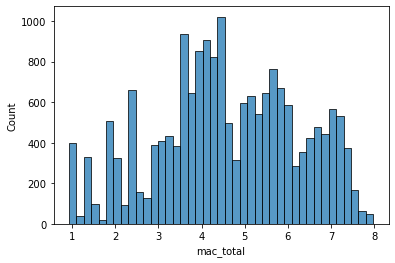

In [54]:
sns.histplot(df['mac_total'])

<AxesSubplot:xlabel='mac_bc', ylabel='Count'>

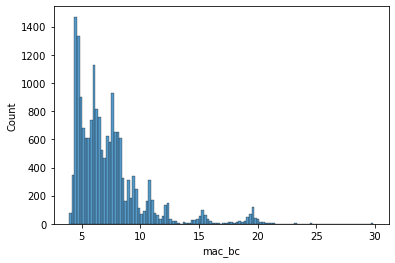

In [55]:
sns.histplot(df['mac_bc'])

TypeError: 'value' must be an instance of str or bytes, not a float

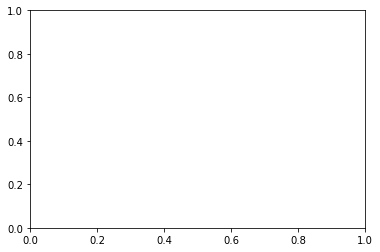

In [56]:
sns.histplot(df['mac_organics'], bins=40)

Checking correlation between features

In [ ]:
sns.pairplot(df)

In [57]:
sns.pairplot(df, vars=['q_ext', 'q_abs', 'q_sca', 'g', 'c_geo', 'c_ext', 'c_abs','c_sca', 'ssa', 'mac_total', 'mac_bc','mac_organics'], palette="deep")

TypeError: 'value' must be an instance of str or bytes, not a float

Error in callback <function flush_figures at 0x000002567EAC8430> (for post_execute):


KeyboardInterrupt: 

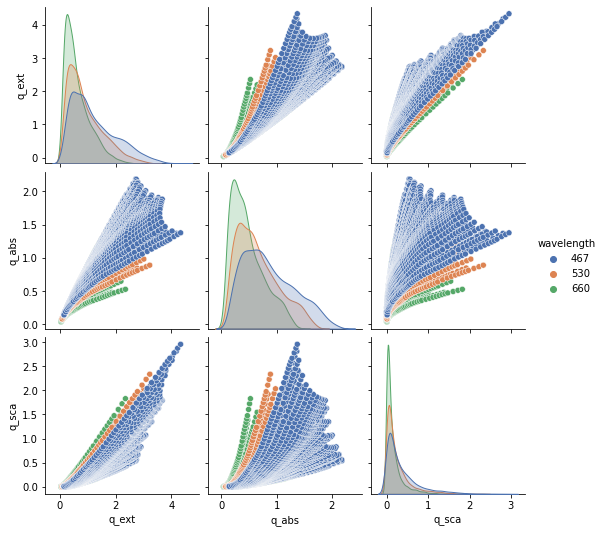

In [58]:
sns.pairplot(df, vars=['q_ext', 'q_abs', 'q_sca'], hue="wavelength", palette="deep")

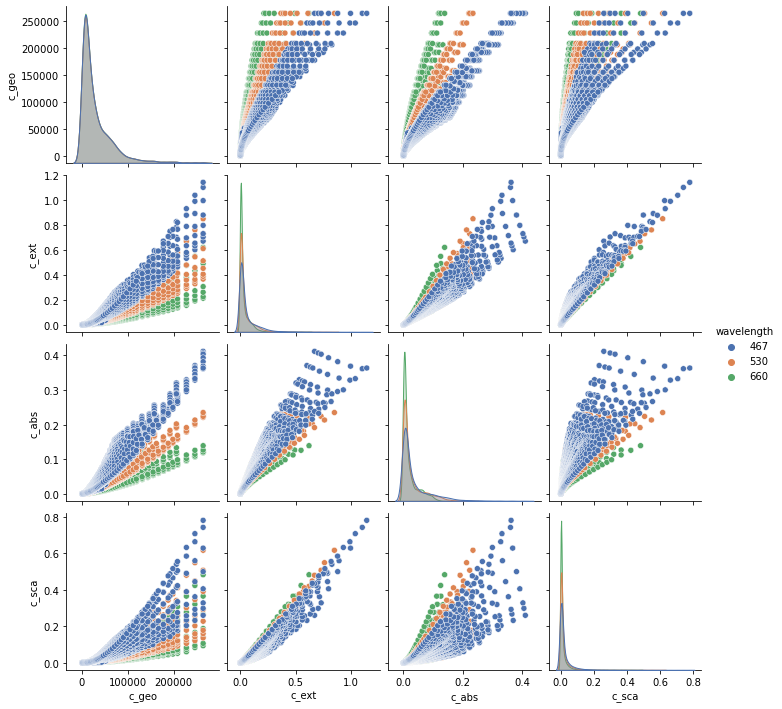

In [59]:
sns.pairplot(df, vars=[ 'c_geo', 'c_ext', 'c_abs','c_sca'], hue="wavelength", palette="deep")

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

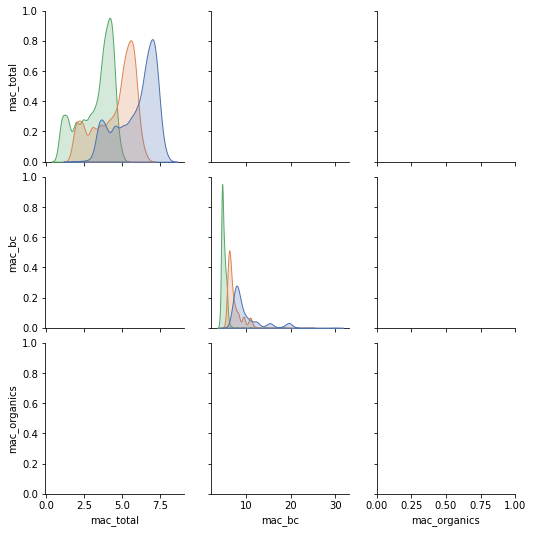

In [70]:
sns.pairplot(df, vars=[ 'mac_total', 'mac_bc','mac_organics'], hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='c_abs'>

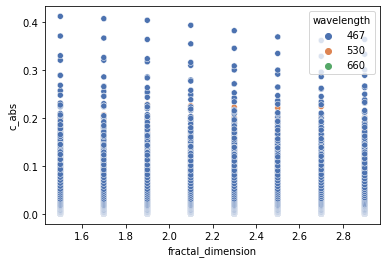

In [71]:
sns.scatterplot(data=df, x="fractal_dimension", y="c_abs", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='c_sca'>

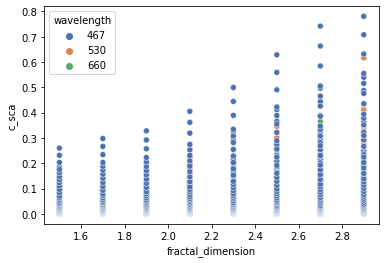

In [72]:
sns.scatterplot(data=df, x="fractal_dimension", y="c_sca", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='g'>

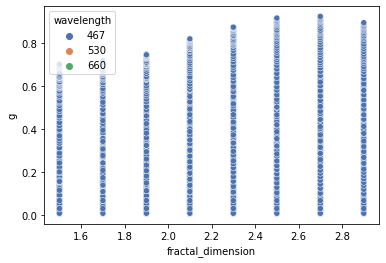

In [73]:
sns.scatterplot(data=df, x="fractal_dimension", y="g", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='fractal_dimension', ylabel='ssa'>

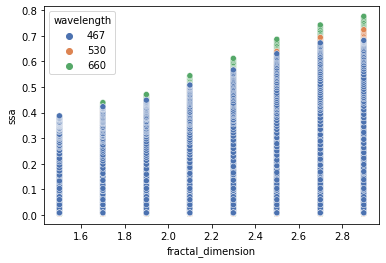

In [74]:
sns.scatterplot(data=df, x="fractal_dimension", y="ssa", hue="wavelength", palette="deep")

<AxesSubplot:xlabel='equi_mobility_dia', ylabel='c_abs'>

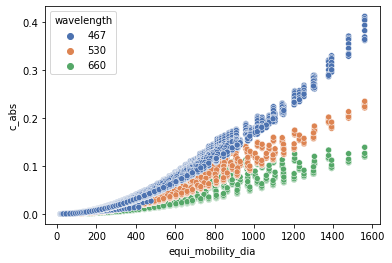

In [75]:
sns.scatterplot(data=df, x="equi_mobility_dia", y="c_abs", hue="wavelength", palette="deep")

In [79]:
#train set leaving fractal dimesnion =2.1, 2.3 out

In [83]:
train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.3)]
test_set=df[(df['fractal_dimension']==2.1) | (df['fractal_dimension']==2.3)]
test_set.shape

(4642, 36)

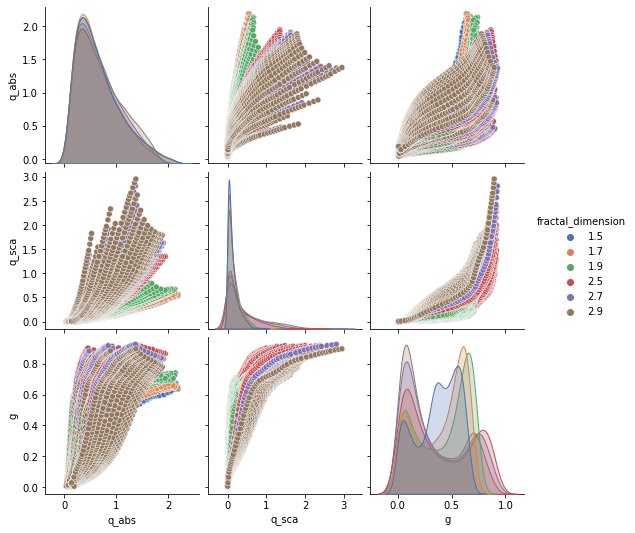

In [84]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")

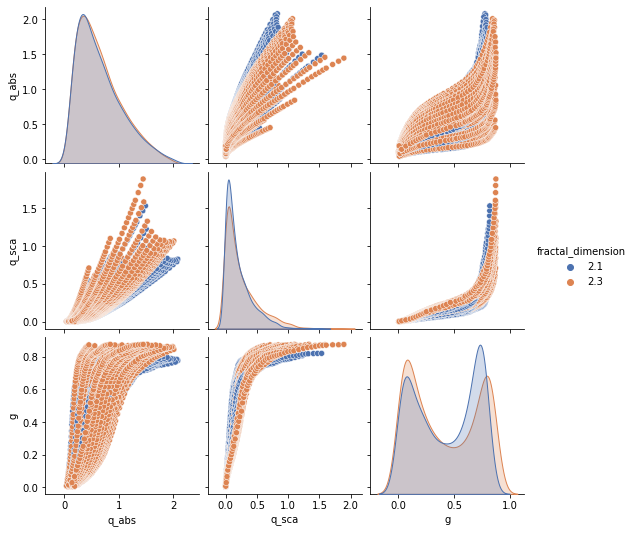

In [85]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep")

In [29]:
error=[]

In [33]:
error.append([4.5,5.4,6.7])

In [34]:
error.append([1,2,3])

In [35]:
error

[[4.5, 5.4, 6.7], [1, 2, 3], [4.5, 5.4, 6.7], [1, 2, 3]]

In [9]:
[0,0,0]+error[0]

[0, 0, 0, 1, 2, 3]

In [ ]:
sum=[]
for x in range (0, len(error[0])):  
    sum.append( lt1[x] + lt2[x])  

In [36]:
error = np.array(error)
error
#print(np.mean(error, axis=0))

array([[4.5, 5.4, 6.7],
       [1. , 2. , 3. ],
       [4.5, 5.4, 6.7],
       [1. , 2. , 3. ]])

In [37]:
error[:,0]

array([4.5, 1. , 4.5, 1. ])

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x27ecc988a00>,
 'caps': [<matplotlib.lines.Line2D at 0x27ecc988fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ecc988730>],
 'medians': [<matplotlib.lines.Line2D at 0x27eccb8b580>],
 'fliers': [<matplotlib.lines.Line2D at 0x27eccb8b850>],
 'means': []}

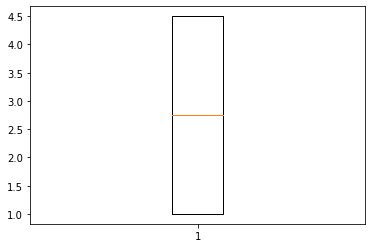

In [40]:
plt.boxplot(error[:,0])

In [21]:
np.std(error, axis=0)

array([1.4 , 1.36, 1.48])

In [25]:
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]

In [26]:
train_set = df[(df['fractal_dimension'] >1.7)]
test_set = df[(df['fractal_dimension'] <= 1.7)]

In [28]:
len(test_set)

4682

In [41]:
dict1={'mean_sq':error}

In [42]:
dict1

{'mean_sq': array([[4.5, 5.4, 6.7],
        [1. , 2. , 3. ],
        [4.5, 5.4, 6.7],
        [1. , 2. , 3. ]])}

In [43]:
dict1['huber']=error

In [44]:
dict1

{'mean_sq': array([[4.5, 5.4, 6.7],
        [1. , 2. , 3. ],
        [4.5, 5.4, 6.7],
        [1. , 2. , 3. ]]),
 'huber': array([[4.5, 5.4, 6.7],
        [1. , 2. , 3. ],
        [4.5, 5.4, 6.7],
        [1. , 2. , 3. ]])}

In [45]:
dict1['huber']

array([[4.5, 5.4, 6.7],
       [1. , 2. , 3. ],
       [4.5, 5.4, 6.7],
       [1. , 2. , 3. ]])

In [46]:
dict2={}


In [47]:
dict2['huber']=error
dict2

{'huber': array([[4.5, 5.4, 6.7],
        [1. , 2. , 3. ],
        [4.5, 5.4, 6.7],
        [1. , 2. , 3. ]])}

In [48]:
str1='ddd'
dict2[str1]=error

In [49]:
dict2

{'huber': array([[4.5, 5.4, 6.7],
        [1. , 2. , 3. ],
        [4.5, 5.4, 6.7],
        [1. , 2. , 3. ]]),
 'ddd': array([[4.5, 5.4, 6.7],
        [1. , 2. , 3. ],
        [4.5, 5.4, 6.7],
        [1. , 2. , 3. ]])}

In [15]:
#Checking formulae
import math

In [17]:
q_ext=df['q_abs']+df['q_sca']
q_ext

0        0.117299
1        0.154005
2        0.183565
3        0.203146
4        0.219813
           ...   
18521    3.861600
18522    3.944400
18523    4.095400
18524    4.224700
18525    4.330200
Length: 18526, dtype: float64

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

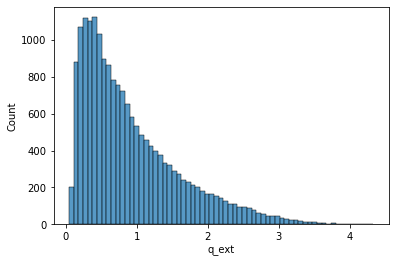

In [12]:
sns.histplot(df['q_ext'])

<AxesSubplot:xlabel='q_ext', ylabel='Count'>

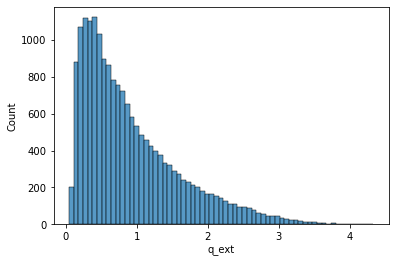

In [14]:
sns.histplot(df['q_ext'])

In [16]:
c_geo=(math.pi)*((df['vol_equi_radius_outer'])**2)

<AxesSubplot:xlabel='c_geo', ylabel='Count'>

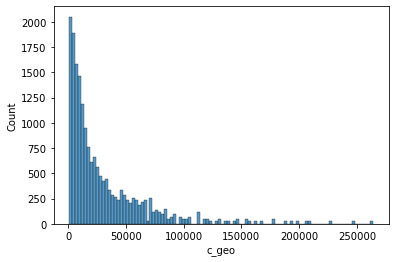

In [17]:
sns.histplot(df['c_geo'])

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

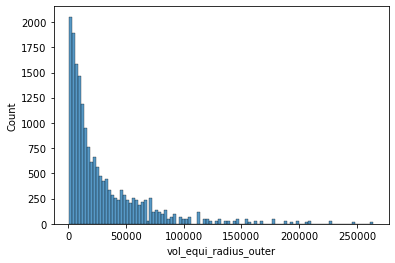

In [18]:
sns.histplot(c_geo)

In [19]:
c_ext= (df['q_ext']*df['c_geo'])/(float(1000000))

<AxesSubplot:xlabel='c_ext', ylabel='Count'>

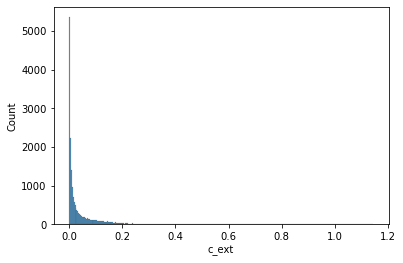

In [20]:
sns.histplot(df['c_ext'])

<AxesSubplot:ylabel='Count'>

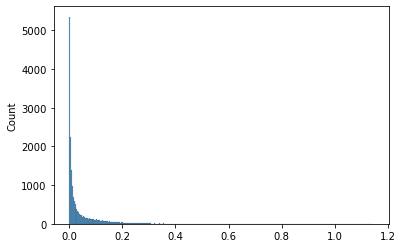

In [21]:
sns.histplot(c_ext)

In [23]:
c_abs= df['q_abs']*df['c_geo']/(1000000)

<AxesSubplot:xlabel='c_abs', ylabel='Count'>

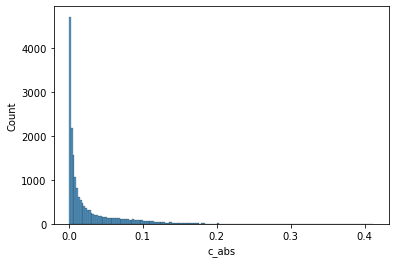

In [24]:
sns.histplot(df['c_abs'])

<AxesSubplot:ylabel='Count'>

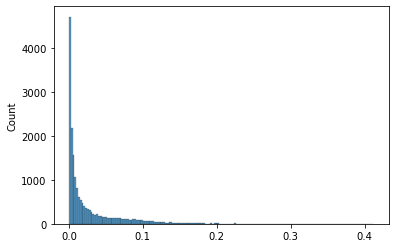

In [25]:
sns.histplot(c_abs)

In [26]:
c_sca= df['q_sca']*df['c_geo']/(1000000)

<AxesSubplot:ylabel='Count'>

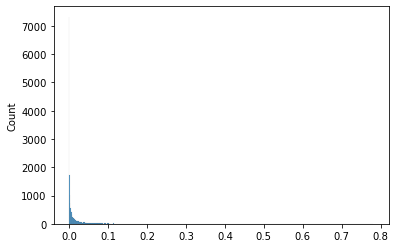

In [27]:
sns.histplot(c_sca)

<AxesSubplot:xlabel='c_sca', ylabel='Count'>

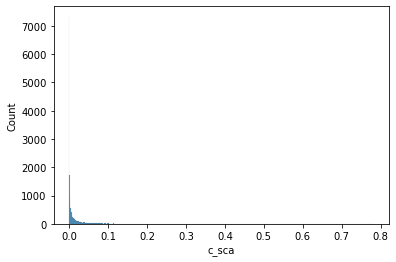

In [28]:
sns.histplot(df['c_sca'])

In [29]:
ssa=df['q_sca']/df['q_ext']

<AxesSubplot:xlabel='ssa', ylabel='Count'>

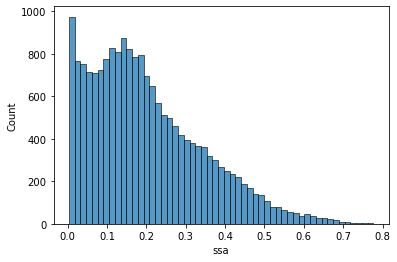

In [30]:
sns.histplot(df['ssa'])

<AxesSubplot:ylabel='Count'>

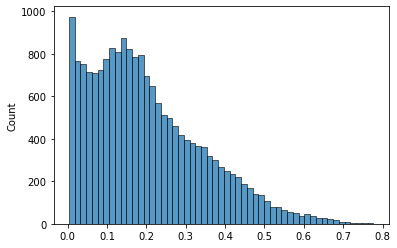

In [31]:
sns.histplot(ssa)

In [45]:
mac_total=(df['c_abs'])/(df['mass_total']*1000000000000)

<AxesSubplot:ylabel='Count'>

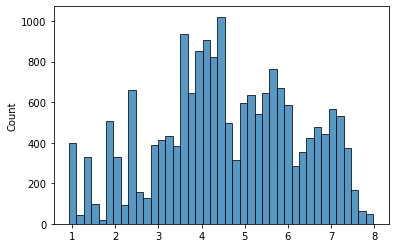

In [46]:
sns.histplot(mac_total)

<AxesSubplot:xlabel='mac_total', ylabel='Count'>

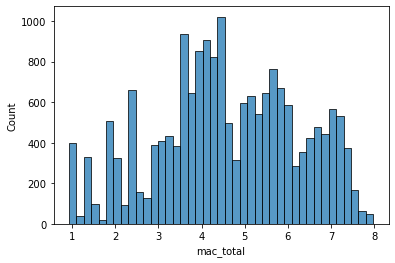

In [47]:
sns.histplot(df['mac_total'])

In [48]:
mac_bc=df['c_abs']/(df['mass_bc']*(1000000000000))

<AxesSubplot:ylabel='Count'>

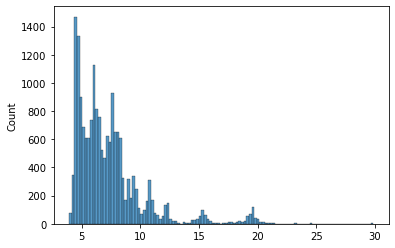

In [49]:
sns.histplot(mac_bc)

<AxesSubplot:xlabel='mac_bc', ylabel='Count'>

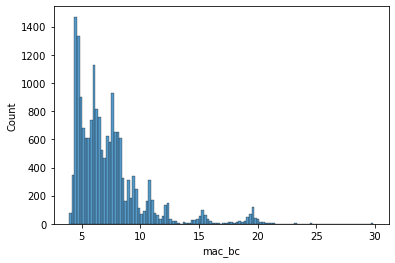

In [50]:
sns.histplot(df['mac_bc'])

In [51]:

mac_organics=df['c_abs']/(df['mass_organics']*(1000000000000))

<AxesSubplot:ylabel='Count'>

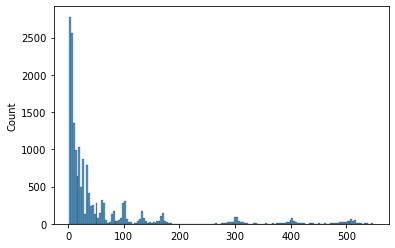

In [52]:
sns.histplot(mac_organics)

<AxesSubplot:xlabel='mac_organics', ylabel='Count'>

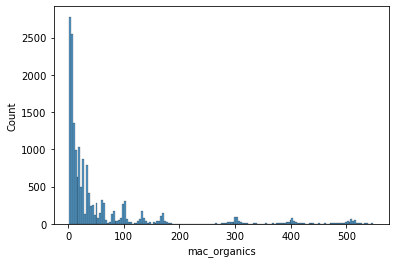

In [57]:
mc_o=df[df['mac_organics']!='na']
sns.histplot(mc_o['mac_organics'])

In [7]:
import math
volume_total=(4*math.pi*(df['vol_equi_radius_outer']**3))/3

<AxesSubplot:xlabel='volume_total', ylabel='Count'>

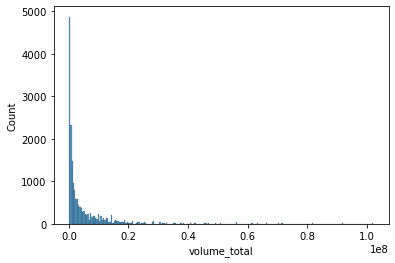

In [8]:
sns.histplot(df['volume_total'])

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

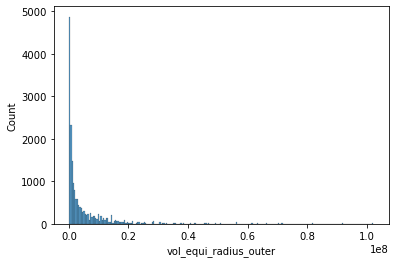

In [9]:
sns.histplot(volume_total)

In [10]:

volume_bc=(4*math.pi*(df['vol_equi_radius_inner']**3))/3

<AxesSubplot:xlabel='volume_bc', ylabel='Count'>

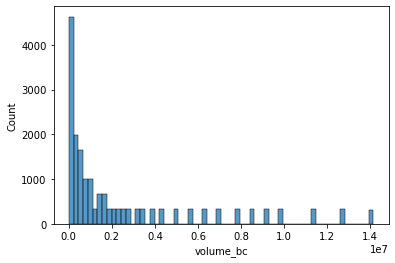

In [11]:
sns.histplot(df['volume_bc'])

<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

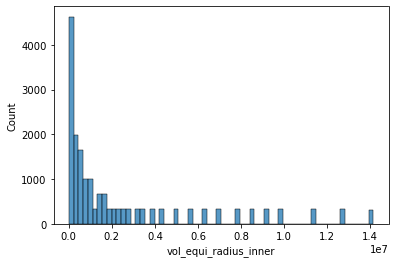

In [12]:
sns.histplot(volume_bc)

In [14]:

volume_organics=volume_total-volume_bc

<AxesSubplot:xlabel='volume_organics', ylabel='Count'>

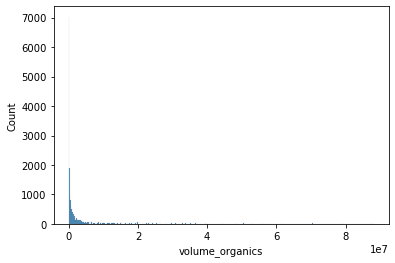

In [15]:
sns.histplot(df['volume_organics'])

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

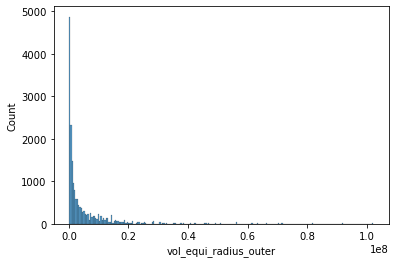

In [16]:
sns.histplot(volume_total)

In [70]:
1e8

100000000.0

In [95]:
mass_bc=df['volume_bc']*df['density_bc']*(1/1000000000000000000000)

<AxesSubplot:ylabel='Count'>

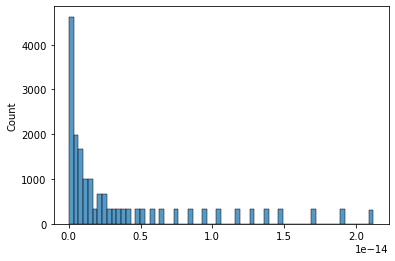

In [96]:
sns.histplot(mass_bc)

<AxesSubplot:xlabel='mass_bc', ylabel='Count'>

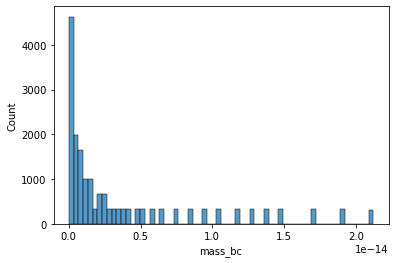

In [97]:
sns.histplot(df['mass_bc'])

In [98]:
mass_organics=df['volume_organics']*df['density_organics']*(1/1000000000000000000000)

<AxesSubplot:ylabel='Count'>

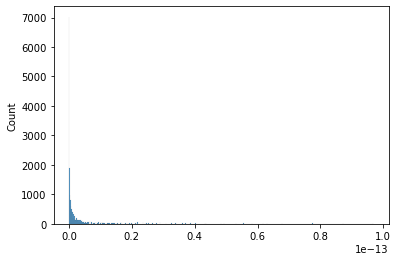

In [99]:
sns.histplot(mass_organics)

<AxesSubplot:xlabel='mass_organics', ylabel='Count'>

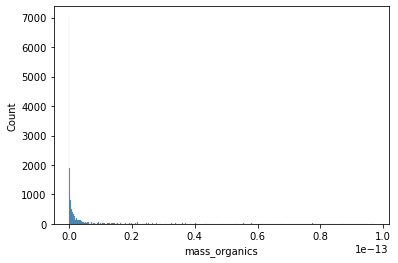

In [100]:
sns.histplot(df['mass_organics'])

In [101]:
mass_total= df['mass_bc']+df['mass_organics']


<AxesSubplot:xlabel='mass_total', ylabel='Count'>

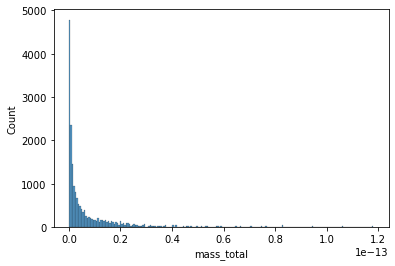

In [102]:
sns.histplot(df['mass_total'])

<AxesSubplot:ylabel='Count'>

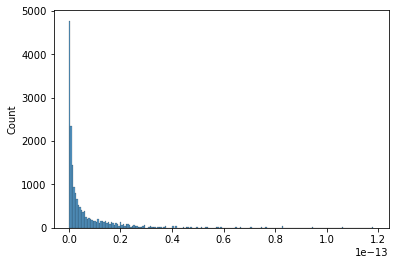

In [103]:
sns.histplot(mass_total)

In [105]:
mr_total_bc=df['mass_total']/df['mass_bc']

<AxesSubplot:ylabel='Count'>

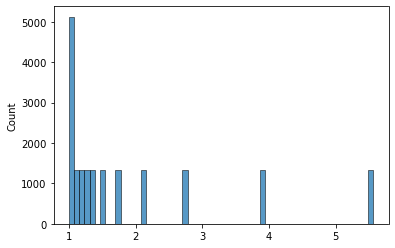

In [106]:
sns.histplot(mr_total_bc)

<AxesSubplot:xlabel='mr_total/bc', ylabel='Count'>

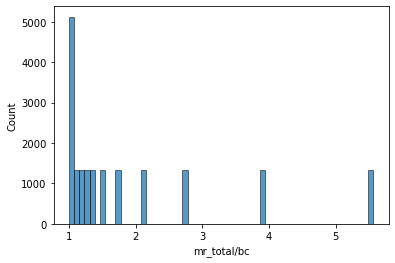

In [107]:
sns.histplot(df['mr_total/bc'])

In [109]:
mr_nonbc_bc=df['mass_organics']/df['mass_bc']

<AxesSubplot:ylabel='Count'>

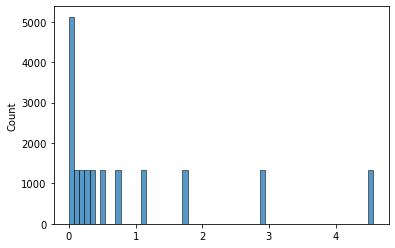

In [110]:
sns.histplot(mr_nonbc_bc)

<AxesSubplot:xlabel='mr_nonBC/BC', ylabel='Count'>

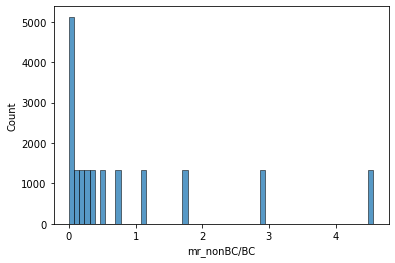

In [111]:
sns.histplot(df['mr_nonBC/BC'])

<AxesSubplot:xlabel='ssa', ylabel='c_geo'>

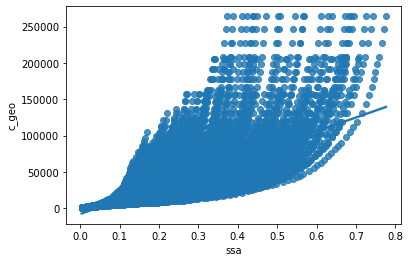

In [35]:
#sns.relplot(df['q_abs'],df['q_sca'], kind='line')
sns.regplot(data=df, x="ssa", y="c_geo")

In [27]:
df.iloc[:, [0, 3, 6, 24, 25, 26, 27]]

,wavelength,primary_particle_size,vol_equi_radius_inner,q_ext,q_abs,q_sca,g
0,660,15.0,15.000000,0.11730,0.11691,0.000389,0.003798
1,660,15.0,18.898816,0.15400,0.15300,0.001005,0.008979
2,660,15.0,21.633744,0.18357,0.18181,0.001755,0.016226
3,660,15.0,23.811016,0.20315,0.20063,0.002516,0.022854
4,660,15.0,25.649639,0.21981,0.21649,0.003323,0.029703
...,...,...,...,...,...,...,...
18521,467,29.0,129.935866,3.86170,1.25870,2.602900,0.878050
18522,467,29.0,133.185600,3.94440,1.27970,2.664700,0.882120
18523,467,29.0,139.247665,4.09550,1.31900,2.776400,0.888430
18524,467,29.0,144.823408,4.22470,1.35080,2.873900,0.892620


<AxesSubplot:xlabel='q_abs', ylabel='Count'>

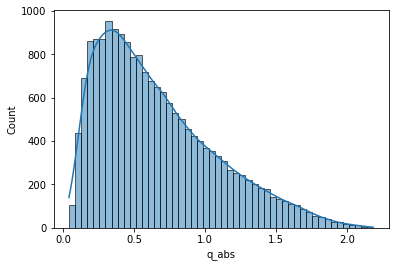

In [14]:
sns.histplot(df['q_abs'],kde=True)

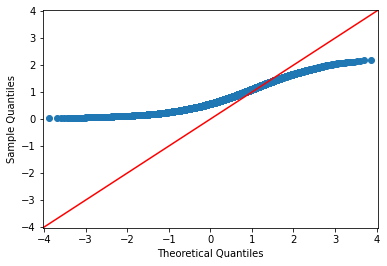

In [21]:
import numpy as np
import statsmodels.api as sm
import pylab as py
  

sm.qqplot(df['q_abs'], line ='45')
py.show()

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaling_y = StandardScaler()
df1=df.iloc[:,:30]
df1 = scaling_y.fit_transform(df1)
df1=pd.DataFrame(data=df1)
df1[25]

0       -1.315284
1       -1.228326
2       -1.158910
3       -1.113563
4       -1.075349
           ...   
18521    1.435824
18522    1.486422
18523    1.581115
18524    1.657736
18525    1.717490
Name: 25, Length: 18526, dtype: float64

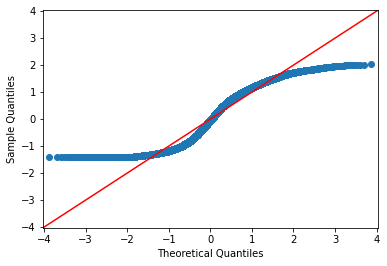

In [41]:
sm.qqplot(df1[27], line ='45')
py.show()

In [44]:
df2=df.iloc[:,:30]
df2 = np.log(df2)
df2=pd.DataFrame(data=df2)
df2['q_abs']

0       -2.146351
1       -1.877317
2       -1.704793
3       -1.606293
4       -1.530211
           ...   
18521    0.230079
18522    0.246626
18523    0.276874
18524    0.300697
18525    0.318890
Name: q_abs, Length: 18526, dtype: float64

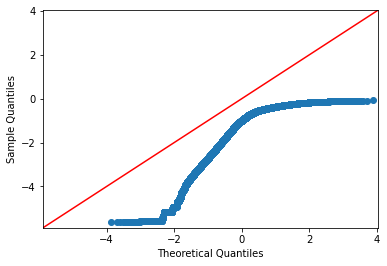

In [47]:
sm.qqplot(df2['g'], line ='45')
py.show()

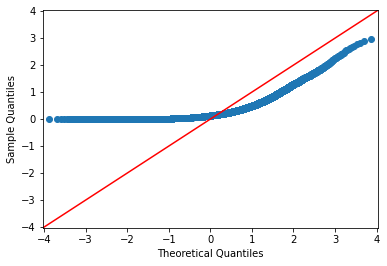

In [16]:
sm.qqplot(df['q_sca'], line ='45')
py.show()

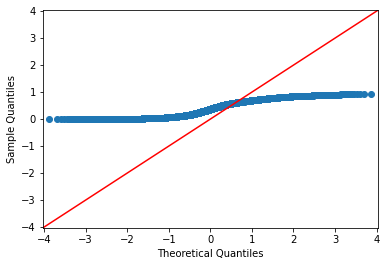

In [17]:
sm.qqplot(df['g'], line ='45')
py.show()

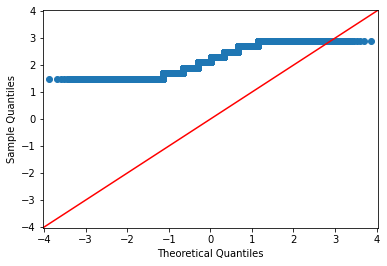

In [18]:
sm.qqplot(df['fractal_dimension'], line ='45')
py.show()

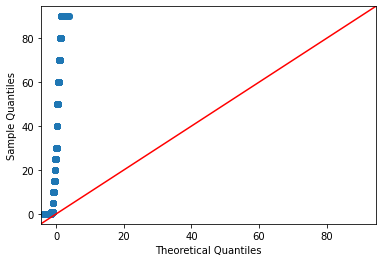

In [19]:
sm.qqplot(df['fraction_of_coating'], line ='45')
py.show()

In [69]:
size=df['equi_mobility_dia']/(2*0.7943*(df['number_of_primary_particles'])**0.51)

<AxesSubplot:xlabel='primary_particle_size', ylabel='Count'>

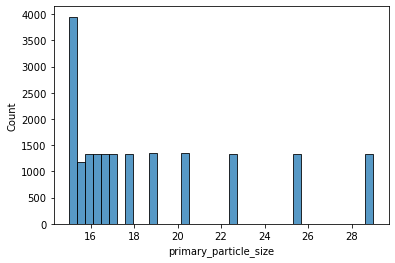

In [70]:
sns.histplot(df['primary_particle_size'])

<AxesSubplot:ylabel='Count'>

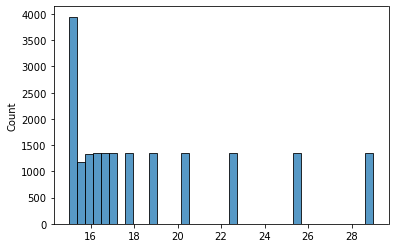

In [71]:
sns.histplot(size)

In [6]:
import math

In [11]:
#vol_equi_radius_outer=((3*df['number_of_primary_particles']*4*math.pi*(size)**3)/(4*math.pi*3)) ** (1. / 3)

<AxesSubplot:xlabel='vol_equi_radius_outer', ylabel='Count'>

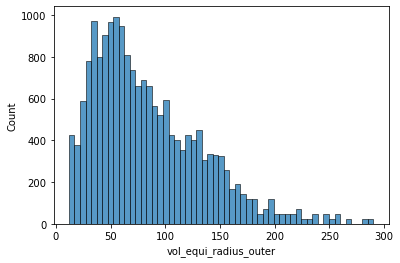

In [79]:
sns.histplot(df['vol_equi_radius_outer'])

<AxesSubplot:ylabel='Count'>

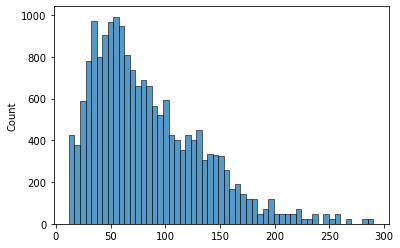

In [80]:
sns.histplot(vol_equi_radius_outer)

In [58]:
inner_size=((3*(1-(df['fraction_of_coating']/100))*4*math.pi*(size**3))/(4*math.pi*3)) ** (1. / 3)

<AxesSubplot:ylabel='Count'>

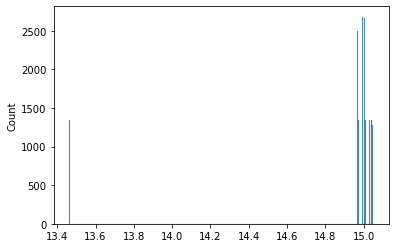

In [59]:
sns.histplot(inner_size)

In [66]:
vol_equi_radius_inner=((3*df['number_of_primary_particles']*4*math.pi*(15)**3)/(4*math.pi*3)) ** (1. / 3)

In [60]:
vol_equi_radius_inner=inner_size*(df['number_of_primary_particles'] ** (1. / 3))

In [72]:
vol_equi_radius_outer=df['primary_particle_size']*(df['number_of_primary_particles'] ** (1. / 3))

<AxesSubplot:xlabel='number_of_primary_particles', ylabel='Count'>

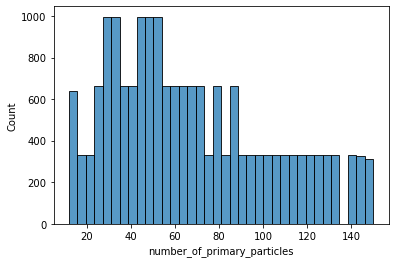

In [67]:
sns.histplot(vol_equi_radius_inner)

<AxesSubplot:xlabel='vol_equi_radius_inner', ylabel='Count'>

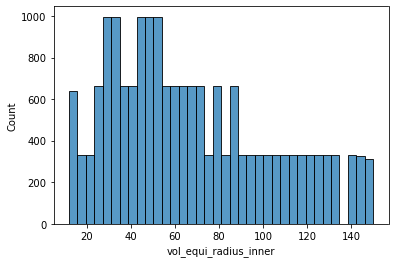

In [68]:
sns.histplot(df['vol_equi_radius_inner'])

In [75]:
num=(df['equi_mobility_dia']/(2*0.7943*df['primary_particle_size']))**(1/0.51)

<AxesSubplot:ylabel='Count'>

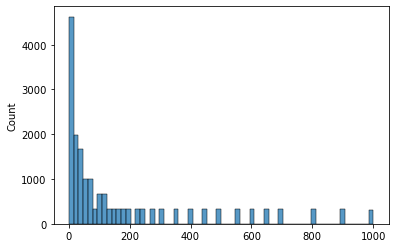

In [76]:
sns.histplot(num)

<AxesSubplot:xlabel='number_of_primary_particles', ylabel='Count'>

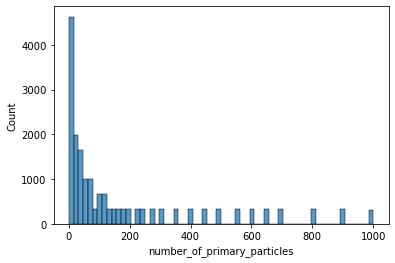

In [77]:
sns.histplot(df['number_of_primary_particles'])

In [78]:
vol_equi_radius_outer=df['primary_particle_size']*(num ** (1. / 3))